# Миронова Елена, РИМ-181226

# 2. Устройство изображения. Работа с изображением в Python.
  ## 2.1 Цифровое изображение. Чтение, запись, работа с пикселями
   ### 2.1.1 
Предположим, что вы хотите хранить цветные изображения с указанием прозрачности каждого пикселя. Для каждого пикселя потребуется хранить четыре числа: три цветных компоненты (R, G и B) со значениями в диапазоне [0..31] каждая и компоненту прозрачности — число в диапазоне [0..63]. Сколько бит потребуется для хранения значений одного пикселя?

`5 + 5 + 5 + 6 = 21`
### 2.1.2 Количество столбцов
Прочитайте изображение из файла img.png и выведите количество столбцов этого изображения на стандартный вывод.

In [59]:
from skimage.io import imread, imshow, imsave
import numpy as np
from numpy import roll
from skimage import img_as_float, img_as_ubyte
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = imread('https://stepik.org/media/attachments/lesson/58180/img.png')
img.shape[1]

419

### 2.1.3 Изменение цвета пикселя изображения
Прочитайте изображение из файла img.png. У этого изображения нечетное количество строк и столбцов. Поменяйте цвет центрального пикселя этого изображения на зеленый цвет rgb (102, 204, 102) и сохраните изображение в файл out_img.png.

C:\Users\elenamir\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\elenamir\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


True

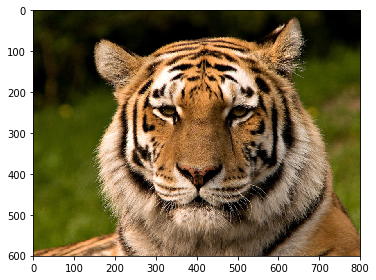

In [21]:
img = imread('https://stepik.org/media/attachments/lesson/58180/tiger-color.png')
img2 = imread('https://stepik.org/media/attachments/lesson/58180/tiger-color-green-pixel.png')

x1 = img.shape[0]//2
x2 = img.shape[1]//2

img[x1, x2] = [102, 204, 102]

imshow(img)#если открыть сохраненную картинку, то можно увидеть зеленый пиксель на носу у тигра
np.array_equal(img,img2)

In [23]:
imsave('out_img.png', img) #сохранение картинки с зеленым центральным пикселем

### 2.1.4 Изменение цвета прямоугольника
Загрузите изображение из файла img.png. Оно имеет нечетное количество строк и столбцов. В центре этого изображения находится прямоугольник размером 7 строк и 15 столбцов. Поменяйте его цвет на розовый rgb(255, 192, 203) и сохраните в файл out_img.png.

In [25]:
img = imread('https://stepik.org/media/attachments/lesson/58180/tiger-gray.png')
img2 = imread('https://stepik.org/media/attachments/lesson/58180/tiger-pink.png')

In [28]:
row = img.shape[0]//2
col = img.shape[1]//2
img[row - 3: row + 4, col - 7:col + 8] = [255, 192, 203]

np.array_equal(img, img2)

True

C:\Users\elenamir\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\elenamir\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


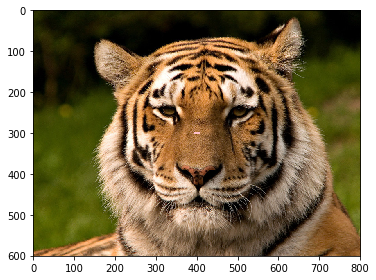

In [30]:
imshow(img) #На картинке ниже даже виден прямоугольник
imsave('out_img2.png', img)

### 2.1.5 Определение рамки изображения
Изображение состоит из рамки сплошного цвета и внутренней части изображения. Цвет рамки можно узнать, посмотрев на левый верхний пиксель. Рамка может иметь разную ширину со всех четырех сторон. Определите размеры рамки и выведите эти размеры через пробел. Размеры рамки выводите в следующем порядке: левый, верхний, правый, нижний.

C:\Users\elenamir\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\elenamir\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


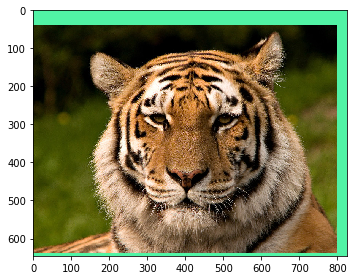

In [32]:
img = imread('https://stepik.org/media/attachments/lesson/58180/tiger-border.png')
imshow(img)
plt.show()

In [35]:
c = img[0,0] # border color

row = img.shape[0] - 1
col = img.shape[1] - 1

xs = col//2
ys = row//2

x1, x2, x3, x4 =  0, 0, 0, 0

for i in range(col): # ширина левой границы
    if all(c!= img[xs, i]):
        break
    x1 += 1
    
for i in range(row): # ширина верхней границы
    if all(c!= img[i, ys]):
        break
    x2 += 1
    
for i in range(row): # ширина правой границы
    if all(c!= img[xs, col - i]):
        break
    x3 += 1
    
for i in range(col): # ширина нижней границы
    if all(c!= img[row - i, ys]):
        break
    x4 += 1
    
print(x1, x2, x3, x4)

1 39 25 7


## 2.2 Арифметические операции. Каналы. Вычисление яркости изображения
### 2.2.1 Вычисление негатива изображения
Прочитайте изображение из файла img.png. У этого изображения нечетное количество строк и столбцов. Вычислите негатив изображения и сохраните его в файл out_img.png.

In [36]:
img = imread('https://stepik.org/media/attachments/lesson/58181/tiger-color.png')
img2 = imread('https://stepik.org/media/attachments/lesson/58181/tiger-negative.png')

In [37]:
np.array_equal(255-img, img2) #255-img это и есть негатив

True

C:\Users\elenamir\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\elenamir\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


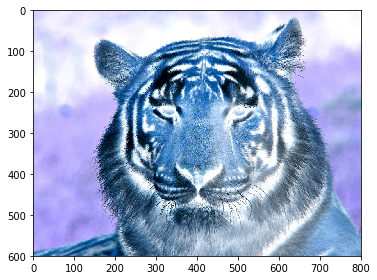

In [41]:
imshow(255-img)

In [45]:
imsave('out_img3.png',255-img)

### 2.2.2 Поменять местами каналы изображения
У этого изображения поменяйте местами каналы так, чтобы вместо порядка RGB каналы шли в порядке BRG.

In [46]:
img = imread('https://stepik.org/media/attachments/lesson/58181/tiger-color.png')
img2 = imread('https://stepik.org/media/attachments/lesson/58181/tiger-brg.png')

In [47]:
# матрицы:
r = img[:,:, 0] #выделяются каналы
g = img[:,:, 1]
b = img[:,:, 2]

img_brg = np.dstack((b,r,g)) #смена порядка каналов с RGB на BRG
np.array_equal(img_brg, img2)

True

C:\Users\elenamir\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\elenamir\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


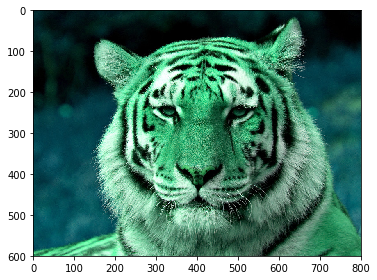

In [48]:
imshow(img_brg)

In [49]:
imsave('out_img4.png',img_brg)

### 2.2.3 Подсчет яркости изображения
Подсчитайте яркость этого изображения и сохраните в файл out_img.png. Результирующее изображение должно быть одноканальным. Для подсчета яркости используйте формулу `Y=0.2126⋅R+0.7152⋅G+0.0722⋅B`, не забудьте сначала перевести изображение в вещественные числа (функция img_as_float), а затем в целые числа (функция img_as_ubyte).

In [56]:
img = imread('https://stepik.org/media/attachments/lesson/58181/tiger-color.png')
img2 = imread('https://stepik.org/media/attachments/lesson/58181/tiger-y.png')

img = img_as_float(img) #Перевод исходного изображения в числа с плавающей запятой
img = 0.2126 * img[:,:,0] + 0.7152 * img[:,:,1] + 0.0722 * img[:,:,2] #Вычисление яркости
img = img_as_ubyte(img) #Приведение одноканального изображения к типу ubyte

np.array_equal(img, img2)

C:\Users\elenamir\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


True

C:\Users\elenamir\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\elenamir\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


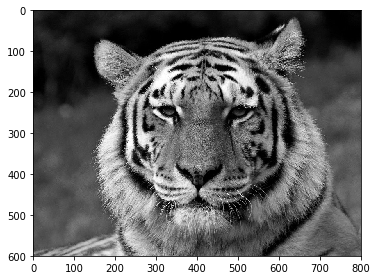

In [57]:
imshow(img)

In [58]:
imsave('out_img5.png',img)

## 2.3 Сопоставление фотографий Прокудина-Горского
### 2.3.1 Сопоставление фотографий Прокудина-Горского
Напишите функцию align, которая сопоставляет изображения с фотографий Прокудина-Горского и возвращает координаты точек на синем и красном каналах, как это описано в видео, слайдах и описании задания.
Прототип функции:
```
def align(img, g_coord):
    row_g, col_g = g_coord
    # считаем сдвиги каналов

    # сдвигаем точку на зеленом канале
    # на другие каналы
    return (row_b, col_b), (row_r, col_r)
```
Для вашего удобства приводится один тест. Вход: ссылка на изображение, координаты точки на зеленом канале. Выход: правильный ответ — координаты точек на синем и красном каналах.

Программа не должна ничего читать и писать на стандартный ввод и вывод, необходимо написать только функцию align.
Программа тестируется на 10 картинках: 00.png, 01.png, 02.png, 03.png, 04.png, 05.png, 06.png, 07.png, 08.png, 09.png. Однако координаты точек приводятся только для первого изображения. Проверьте перед посылкой решения в систему, что программа верно работает на остальных девяти изображениях. Для этого достаточно проверить, что изображения сопоставляются качественно, без визуальных артефактов.

In [60]:
def align(img, g_coord):
    row_g, col_g = g_coord

    img_f = img_as_float(img)
        
    #деление на три канала b g r
    height, width = img.shape
    height = img_f.shape[0]//3
    
    B = img_f[0 : height, 0 : width]
    G = img_f[height : height * 2, 0 : width]
    R = img_f[height * 2 : height * 3, 0 : width]
    
    img_f = np.dstack((R, G, B))
    
    #обрезка 
    pix = 30 
    row, col, _ = img_f.shape
    img_f = img_f[pix : row - pix, pix : col - pix]
    
    R = img_f[:,:,0]
    G = img_f[:,:,1]
    B = img_f[:,:,2]
    
    #синий относительно зеленого
    rows, columns = shift(B, G)
    
    #Смещение координат зеленой точки по синему каналу
    row_b = row_g - rows - height #(высота канала)
    col_b = col_g - columns 
    
    B_shifted = np.roll(B, rows, axis = 0)
    B_shifted = np.roll(B_shifted, columns, axis = 1)
    
    #красный относительно зеленого
    rows, columns = shift(R, G)

    row_r = row_g - rows + height
    col_r = col_g - columns

    R_shifted = np.roll(R, rows, axis = 0)
    R_shifted = np.roll(R_shifted, columns, axis = 1)
    
    imshow(np.dstack((R_shifted, G, B_shifted)))

    return (row_b, col_b), (row_r, col_r)

def shift(img_s, img_b):
 
    shift = {} #хранение сдвига и корреляции

    for row in range(-15, 16): #30
        img_shift = np.roll(img_s, row, axis = 0) # строки

        for col in range(-15, 16):
            img_shift2 = np.roll(img_shift, col, axis = 1) # столбцы
            shift[row, col] = (img_shift2 * img_b).sum() # корреляция
    r, c = max(shift, key=shift.get)
    return r, c

In [61]:
strn = []
for i in range(10):
    strn.append('https://stepik.org/media/attachments/lesson/58182/0' + str(i) + ".png")

C:\Users\elenamir\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\elenamir\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


((153, 236), (857, 238))

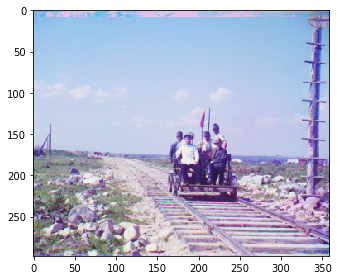

In [62]:
img = imread(strn[0])
align(img, (508, 237))

C:\Users\elenamir\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\elenamir\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


((170, 237), (841, 236))

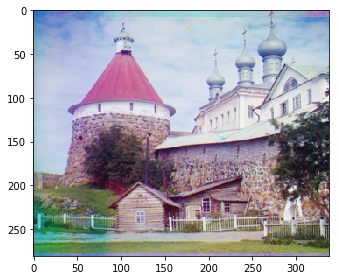

In [66]:
img = imread(strn[1])
align(img, (508, 237)) # рандомные числа

C:\Users\elenamir\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\elenamir\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


((155, 239), (859, 236))

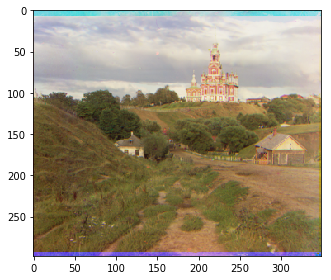

In [64]:
img = imread(strn[2])
align(img, (508, 237)) # random nums

C:\Users\elenamir\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\elenamir\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


((124, 237), (891, 234))

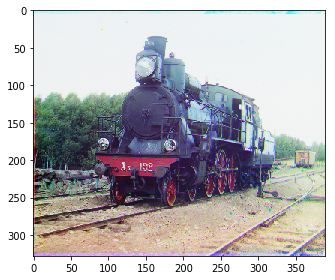

In [67]:
img = imread(strn[3])
align(img, (508, 237))

C:\Users\elenamir\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\elenamir\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


((122, 238), (889, 236))

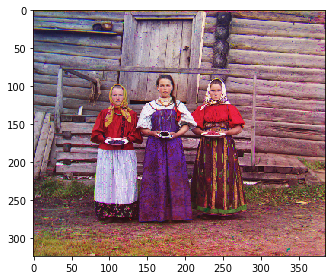

In [68]:
img = imread(strn[4])
align(img, (508, 237))

C:\Users\elenamir\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\elenamir\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


((125, 239), (889, 235))

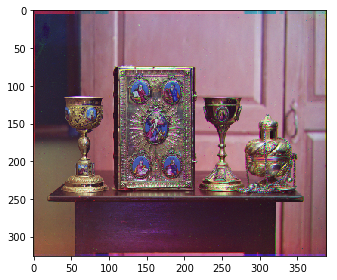

In [69]:
img = imread(strn[5])
align(img, (508, 237))

C:\Users\elenamir\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\elenamir\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


((125, 240), (889, 234))

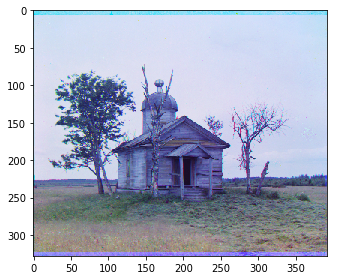

In [70]:
img = imread(strn[6])
align(img, (508, 237))

C:\Users\elenamir\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\elenamir\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


((161, 237), (854, 238))

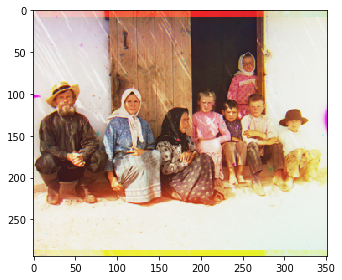

In [71]:
img = imread(strn[7])
align(img, (508, 237))

C:\Users\elenamir\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\elenamir\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


((129, 242), (886, 234))

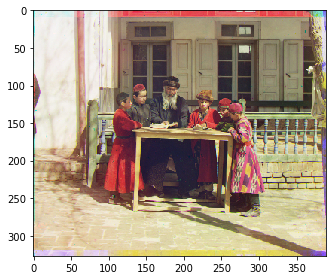

In [72]:
img = imread(strn[8])
align(img, (508, 237))

C:\Users\elenamir\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\elenamir\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


((129, 240), (886, 235))

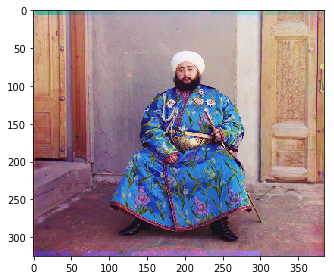

In [73]:
img = imread(strn[9])
align(img, (508, 237))